In [3]:
#Question 1 
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

student_score = pd.read_csv('Dataset student_score.csv')

print(student_score.head())

slope, intercept, r_value, p_value, std_err = stats.linregress(student_score['Xi'], student_score['Yi'])

print(f"slope: {slope}")
print(f"y-intercept: {intercept}")
print(f"The linear regression equation is: y = {slope:.2f}x + {intercept:.2f}")
print(f"If a student scored 80 on the test, we would expect them to get a grade of: {slope * 80 + intercept:.2f}")

pred = [slope * i + intercept for i in student_score['Xi']]
result = student_score['Yi'].values
MSE=mean_squared_error(pred, result)
print("Mean Squared Error is :",MSE)

R_squared=r_value**2
print("R-Squared : ",R_squared)

print('Based on the  Mean Squared Error and R-Squared value, the regression equation does not fit the regression line pretty well.')

   Student  Xi  Yi
0        1  95  85
1        2  85  95
2        3  80  70
3        4  70  65
4        5  60  70
slope: 0.6438356164383562
y-intercept: 26.78082191780822
The linear regression equation is: y = 0.64x + 26.78
If a student scored 80 on the test, we would expect them to get a grade of: 78.29
Mean Squared Error is : 65.4794520547945
R-Squared :  0.4803218090889323
Based on the  Mean Squared Error and R-Squared value, the regression equation does not fit the regression line pretty well.


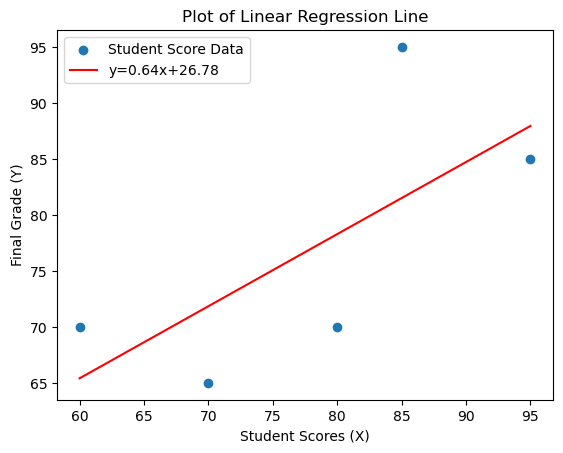

In [4]:
#Question2
plt.title('Plot of Linear Regression Line')
plt.xlabel('Student Scores (X)')
plt.ylabel('Final Grade (Y)')
plt.scatter(student_score['Xi'], student_score['Yi'], label='Student Score Data')
x = student_score['Xi']
plt.plot(x, pred, '-r', label='y=0.64x+26.78')
plt.legend(loc='upper left')
plt.show()

In [5]:
#Question 3
import pandas as pd
from scipy import stats

student_score = pd.read_csv('Dataset student_score.csv')

slope, intercept, r_value, p_value, std_err = stats.linregress(student_score['Xi'], student_score['Yi'])
print(f'R-Squared value = {r_value**2:.2f}')

R-Squared value = 0.48


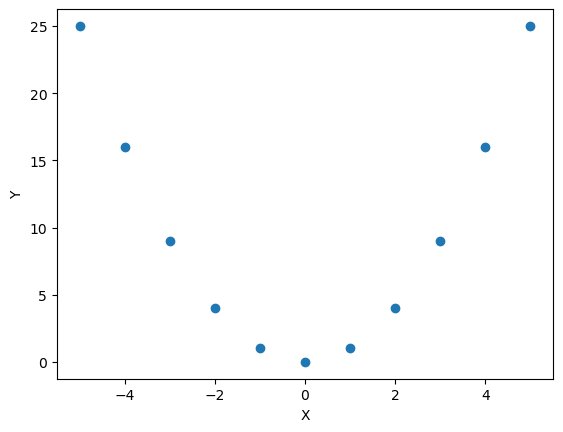

This is a polynomial regression model (Quadratic fit)


In [1]:
#Question 4
import pandas as pd
from matplotlib import pyplot as plt

x = [-4,-2,1,3,-1,-5,4,2,0,-3,5]
y = [16,4,1,9,1,25,16,4,0,9,25]

plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x, y)
plt.show()
print("This is a polynomial regression model (Quadratic fit)")

In [10]:
#Question 5.1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

# Load the dataset
df = pd.read_csv('Dataset heart-disease-dataset.csv')

# Convert 'ca' and 'thal' to numeric, handling non-numeric values
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

# Remove rows with NaN values
df_clean = df.dropna()

# Splitting the dataset into features (X) and target variable (y)
X = df_clean.drop('result', axis=1)  # Features
y = df_clean['result']  # Target variable

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training a Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Adjust max_iter if needed for convergence
model.fit(X_train_scaled, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test_scaled)

# Evaluating the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Analyzing feature importance
importance = model.coef_[0]
features = X.columns
for i, v in enumerate(importance):
    print(f"Feature: {features[i]}, Score: {v}")
    

#Question 5.2
# Load the dataset
df2 = pd.read_csv('Dataset heart-disease-dataset.csv')

# Remove rows with NaN values
df2.replace('?', pd.NA, inplace=True)
df2_clean = df2.dropna()

df2_clean = df2_clean.apply(pd.to_numeric)


# Splitting the dataset into features (X) and target variable (y)
X2 = df2_clean.drop('result', axis=1)  # Features
y2 = df2_clean['result']  # Target variable

# Splitting dataset into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=5)

# Training a Linear Regression model
model2 = linear_model.LogisticRegression(max_iter=100000)
model2.fit(X2_train, y2_train)

# Predicting the Test set results
y2_pred = model2.predict(X2_test)

# Calculate mean squared error
mse = mean_squared_error(y2_test, y2_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = round(model2.score(X2_test, y2_test),2)
print("R-squared:", r2)


Accuracy Score: 0.6166666666666667
Confusion Matrix:
 [[34  1  0  1  0]
 [ 5  1  0  2  1]
 [ 2  1  1  1  0]
 [ 1  2  1  1  2]
 [ 1  1  0  1  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        36
           1       0.17      0.11      0.13         9
           2       0.50      0.20      0.29         5
           3       0.17      0.14      0.15         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.32      0.28      0.29        60
weighted avg       0.56      0.62      0.58        60

Feature: age, Score: -0.0858921202698769
Feature: sex, Score: -0.5704136586116729
Feature: cp, Score: -0.6468815164944524
Feature: tresbps, Score: -0.4829631430204052
Feature: chol, Score: -0.20082054196813257
Feature: fbs, Score: 0.28926676895245446
Feature: restecg, Score: -0.3084469347411086
Feature: thalach, Score: 0.45372970471369406
F